In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
#for encoding data
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

from keras import regularizers

## Part 1 Image Classification (70p)


In [18]:
%%time
import data_generator

train_examples = 50000
test_examples=1000

train_generator = data_generator.training_generator(batch_size=train_examples)
test_generator = data_generator.test_generator(batch_size = test_examples)

x_train, x_labels, numbers_sum = next(train_generator)
y_test, y_labels, y_numbers_sum = next(test_generator)

# x.shape == (8, 2, 28, 84)     # 8 pairs of images with height 28px and width 84px
# numbers.shape == (8, 2)       # 8 pairs of numbers corresponding to the images
# numbers_sum.shape == (8, 1)   # 8 numbers that represent the sum of the numbers from the images

x_train, y_test = x_train / 255.0, y_test / 255.0 # scaling the data



CPU times: user 5min 23s, sys: 553 ms, total: 5min 24s
Wall time: 5min 27s


x train shape:  (100000, 28, 84)


Text(0.5,0,'238')

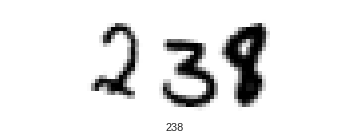

In [19]:
#reshape
x_train =x_train.reshape(-1,28,84)
x_labels = x_labels.reshape(-1)

y_test =y_test.reshape(-1,28,84)
y_labels = y_labels.reshape(-1)

#plot to see everything is ok
print('x train shape: ',x_train.shape)

plt.figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.xlabel(x_labels[1])

##  Data pre-processing
*The reshaping to (-1,28,84) is done in order to extract from the pairs of images, each individual image
Next, we need to reshape our dataset inputs (x_train and x_test) to the shape that our model expects when we train the model. The first number is the number of images (train_examples*2 for x_train and test_examples*2  for X_test because the data_generator returns pair of 2 images and by the previous reshape we have extracted each image). Then comes the shape of each image (28x56). The last number is** 1, which signifies that the images are greyscale.**

In [0]:
x_train = x_train.reshape(train_examples*2,28,84,1)
y_test = y_test.reshape(test_examples*2,28,84,1)

The model is a Sequential one, multiple layers being added on it afterwards.
The first 2 layers are Conv2D.("
*A convolution multiplies a matrix of pixels with a filter matrix or ‘kernel’ and sums up the multiplication values. Then the convolution slides over to the next pixel and repeats the same process until all the image pixels have been covered.*")

The 64 and 32 are the number of nodes on each Conv2D layer.



The activation  on the last layer is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

After each Conv2D layer we have a MaxPooling2D layer in order to downsize and after them a Flatten layer which converts the filter from the convolution into a one dimension vector.




In [28]:

from keras import regularizers

# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

#In a CNN, each neuron produces one feature map.
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28,84,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('softmax'))
# COMPILE
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 82, 64)        640       
_________________________________________________________________
activation_26 (Activation)   (None, 26, 82, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 41, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 39, 32)        18464     
_________________________________________________________________
activation_27 (Activation)   (None, 11, 39, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 19, 32)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3040)              0         
__________

In [29]:
%%time
#train the model
history = model.fit(x_train, x_labels,
          validation_data = (y_test, y_labels),
          batch_size = 64,
          epochs=50)


Train on 100000 samples, validate on 2000 samples
Epoch 1/50
100000/100000 [==============================] - 24s 242us/step - loss: 2.3055 - acc: 0.4196 - val_loss: 0.6364 - val_acc: 0.8105
Epoch 2/50
100000/100000 [==============================] - 23s 232us/step - loss: 0.6909 - acc: 0.7968 - val_loss: 0.3648 - val_acc: 0.9005
Epoch 3/50
100000/100000 [==============================] - 23s 232us/step - loss: 0.4522 - acc: 0.8648 - val_loss: 0.2875 - val_acc: 0.9195
Epoch 4/50
100000/100000 [==============================] - 23s 232us/step - loss: 0.3514 - acc: 0.8936 - val_loss: 0.2495 - val_acc: 0.9290
Epoch 5/50
100000/100000 [==============================] - 23s 232us/step - loss: 0.2855 - acc: 0.9126 - val_loss: 0.2310 - val_acc: 0.9290
Epoch 6/50
100000/100000 [==============================] - 23s 232us/step - loss: 0.2444 - acc: 0.9229 - val_loss: 0.2110 - val_acc: 0.9380
Epoch 7/50
100000/100000 [==============================] - 23s 232us/step - loss: 0.2097 - acc: 0.9338 

The model performs well enough, the accuracy on validation set is higher than 90% and the loss decreases as it continues to learn.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


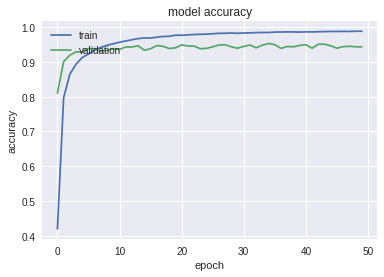

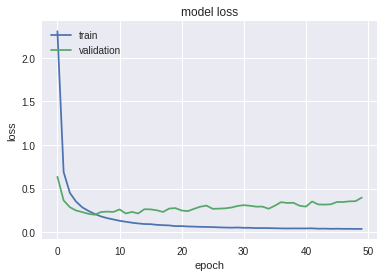

In [30]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Part 2

In [8]:
%%time
import data_generator


train_generator = data_generator.training_generator(batch_size=25000)
test_generator = data_generator.test_generator(batch_size = 10000)

x_train, x_labels, numbers_sum = next(train_generator)
x_test, y_labels, y_numbers_sum = next(test_generator)

x_train.shape == (8, 2, 28, 84)     # 8 pairs of images with height 28px and width 84px
x_labels.shape == (8, 2)       # 8 pairs of numbers corresponding to the images
numbers_sum.shape == (8, 1)   # 8 numbers that represent the sum of the numbers from the images

CPU times: user 2min 37s, sys: 125 ms, total: 2min 37s
Wall time: 2min 37s


## Data processing
For the second part each number has been padded with zeroes in such a way all the numbers are 3 digit(example: 43 becomes 043).
All the training data and the labels are broken into array of digits and using to_categorical from keras are encoded into matrixes from 0 to number_classes, in out case th number of classes being 10.


In [9]:
#for train
#padding with rjust
x_labels_str = np.array([[str(x[0]), str(x[1])] for x in x_labels])
x_labels_str = np.array([[x[0].rjust(3,'0'), x[1].rjust(3,'0')] for x in x_labels_str])
print(x_labels_str[0])

new_array = []
for i in x_labels_str:
    new_array.append(i[0]+i[1])
    
   
#print(new_array)
number_sum_str = np.array([str(x[0]) for x in numbers_sum])
sums = np.array([[x.rjust(3,'0')] for x in number_sum_str])


#for test
y_labels_str = np.array([[str(x[0]), str(x[1])] for x in y_labels])
y_labels_str = np.array([[x[0].rjust(3,'0'), x[1].rjust(3,'0')] for x in y_labels_str])
print(y_labels_str[0])

new_array_test = []
for i in y_labels_str:
    new_array_test.append(i[0]+i[1])
    
   
#print(new_array)
number_sum_str_test = np.array([str(x[0]) for x in y_numbers_sum])
sums_test = np.array([[x.rjust(3,'0')] for x in number_sum_str_test])


#Encoding

def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded


def decode(datum):
    return np.argmax(datum)

#train
digits_array = np.array([[int(d) for d in x] for x in new_array])
digits_sums = np.array([[int(d) for d in x[0]] for x in sums])

#test
digits_array_test = np.array([[int(d) for d in x] for x in new_array_test])
digits_sums_test = np.array([[int(d) for d in x[0]] for x in sums_test])



print("Digits of the sum label: ",digits_sums)



encoded_data = encode(digits_array)
encoded_labels = encode(digits_sums)

encoded_data_test = encode(digits_array_test)
encoded_labels_test = encode(digits_sums_test)
#print(encoded_data) 

# for i in range(encoded_data.shape[0]):
#   datum = encoded_data[i]
#   print('index: %d' % i)
#   print('encoded datum: %s' % datum)
#   decoded_datum = decode(encoded_data[i])
#   print('decoded datum: %s' % decoded_datum)
#   print()

#print(sums)

['082' '110']
['157' '238']
Digits of the sum label:  [[1 9 2]
 [4 2 6]
 [3 2 5]
 ...
 [2 3 6]
 [0 9 0]
 [3 2 0]]
Shape of data (BEFORE encode): (25000, 6)
Shape of data (AFTER  encode): (25000, 6, 10)

Shape of data (BEFORE encode): (25000, 3)
Shape of data (AFTER  encode): (25000, 3, 10)

Shape of data (BEFORE encode): (10000, 6)
Shape of data (AFTER  encode): (10000, 6, 10)

Shape of data (BEFORE encode): (10000, 3)
Shape of data (AFTER  encode): (10000, 3, 10)



In [0]:
encoded_data.shape[1:]

(6, 10)

LSTM are a type of recurrent neural network that are capable of learning the relation between elements in a input sequence.

RepeatVector repeats the very last output of the encoder, in a way giving the same input but at a different hidden state.
The TimeDistributed layer is a wrapper layer over the Dense layer in order to  keep one-to-one relations on input and output.

In [10]:


digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
n_chars = len(digits)

# create LSTM
model = Sequential()
model.add(LSTM(100, input_shape=encoded_data.shape[1:]))
model.add(RepeatVector(3))
model.add(LSTM(100, return_sequences=True))

model.add(TimeDistributed(Dense(n_chars, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 100)            80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 3, 10)             1010      
Total params: 125,810
Trainable params: 125,810
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(encoded_data, encoded_labels,
          validation_data = (encoded_data_test, encoded_labels_test),
          batch_size = 64,
          epochs=50)


Train on 25000 samples, validate on 10000 samples
Epoch 1/50
25000/25000 [==============================] - 14s 545us/step - loss: 1.9439 - acc: 0.2377 - val_loss: 1.8358 - val_acc: 0.2751
Epoch 2/50
25000/25000 [==============================] - 12s 498us/step - loss: 1.7738 - acc: 0.3030 - val_loss: 1.7098 - val_acc: 0.3251
Epoch 3/50
25000/25000 [==============================] - 12s 495us/step - loss: 1.6071 - acc: 0.3835 - val_loss: 1.5204 - val_acc: 0.4242
Epoch 4/50
25000/25000 [==============================] - 12s 496us/step - loss: 1.3907 - acc: 0.4745 - val_loss: 1.2644 - val_acc: 0.5319
Epoch 5/50
25000/25000 [==============================] - 13s 500us/step - loss: 1.2016 - acc: 0.5468 - val_loss: 1.1401 - val_acc: 0.5833
Epoch 6/50
25000/25000 [==============================] - 12s 492us/step - loss: 1.1059 - acc: 0.5883 - val_loss: 1.0700 - val_acc: 0.6039
Epoch 7/50
25000/25000 [==============================] - 12s 493us/step - loss: 1.0396 - acc: 0.6099 - val_loss: 1.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


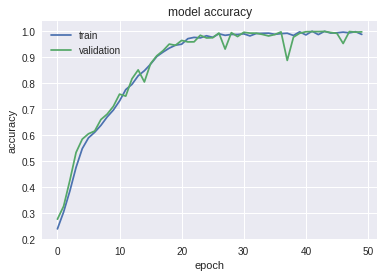

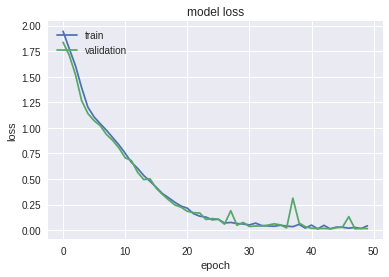

In [12]:
 print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  

In [0]:
The second model seems to behave welll also, as can be observed from the plots above.